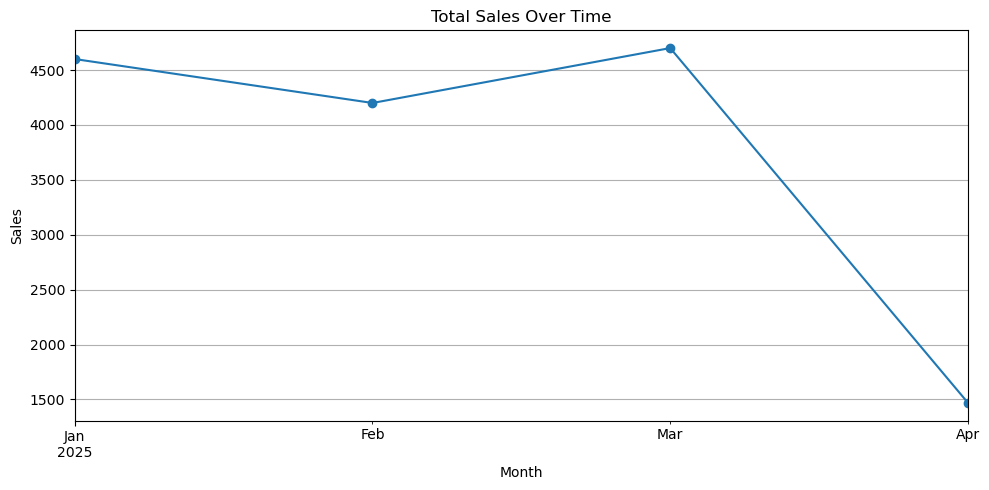

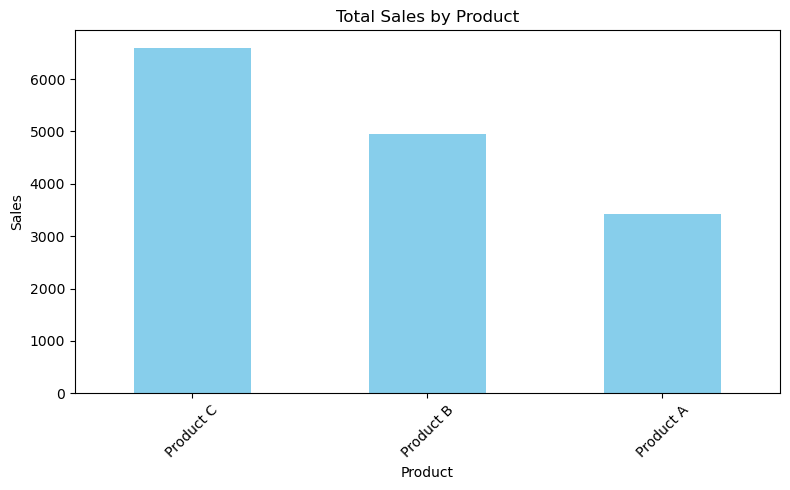

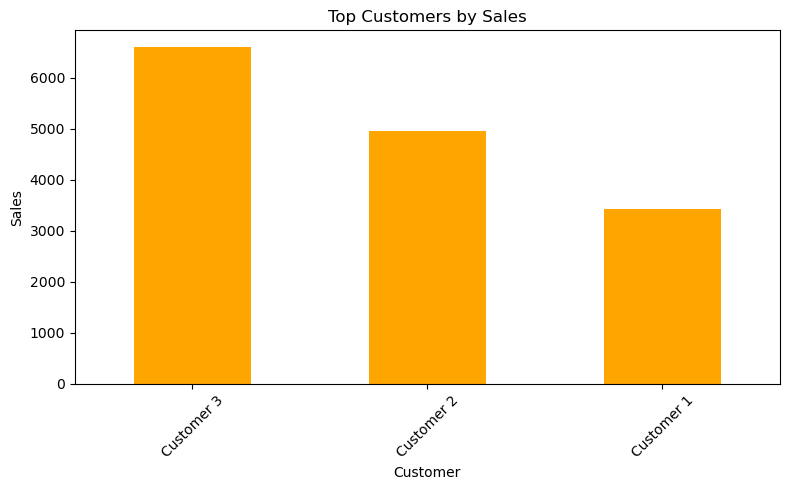

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Example sales data
data = {
    'Date': pd.date_range(start='2025-01-01', periods=100, freq='D'),
    'Product': ['Product A', 'Product B', 'Product C'] * 33 + ['Product A'],
    'Sales': [100, 150, 200] * 33 + [120],
    'Customer': ['Customer 1', 'Customer 2', 'Customer 3'] * 33 + ['Customer 1']
}

df = pd.DataFrame(data)
df['Month'] = df['Date'].dt.to_period('M')

# --- KPI 1: Total Sales Over Time ---
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- KPI 2: Sales by Product ---
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- KPI 3: Top Customers ---
top_customers = df.groupby('Customer')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', color='orange')
plt.title('Top Customers by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Home\Desktop\ml_project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


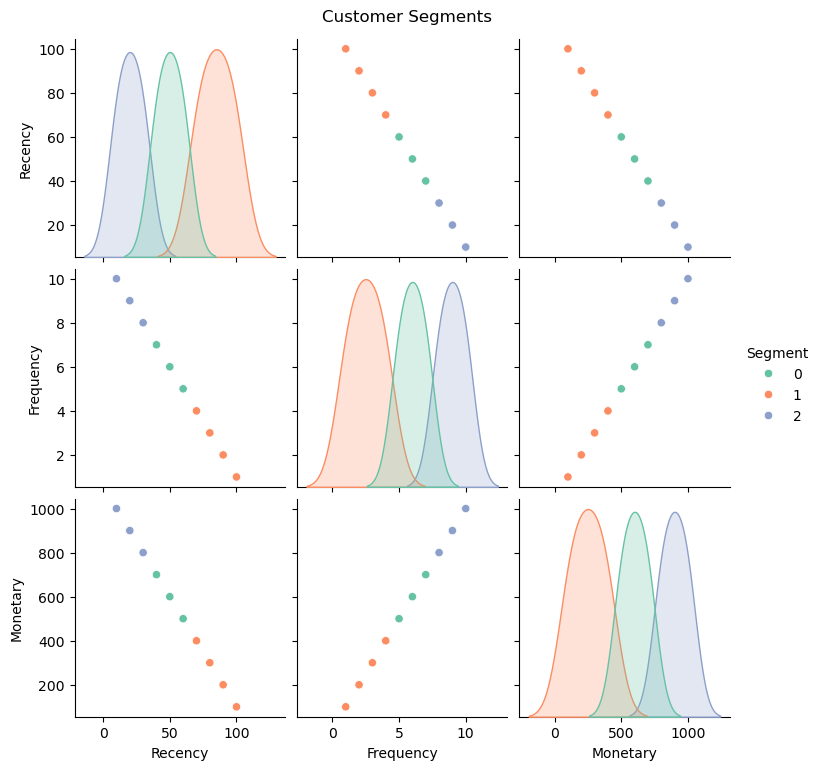

Cluster Centers (original scale):
   Recency  Frequency  Monetary
0     50.0        6.0     600.0
1     85.0        2.5     250.0
2     20.0        9.0     900.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Step 1: Load and Preview Data ---
# Example data
data = {
    'CustomerID': range(1, 11),
    'Recency': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],      # days since last purchase
    'Frequency': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],               # number of purchases
    'Monetary': [1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]  # total spend
}
df = pd.DataFrame(data)

# --- Step 2: Preprocessing ---
features = ['Recency', 'Frequency', 'Monetary']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: KMeans Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# --- Step 4: Visualize the Clusters ---
sns.pairplot(df, hue='Segment', vars=features, palette='Set2')
plt.suptitle('Customer Segments', y=1.02)
plt.show()

# --- Optional: Cluster Centers ---
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Cluster Centers (original scale):")
print(centers)
